In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kruskal
from scipy.stats import chi2_contingency
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Importing the data set

In [6]:
df = pd.read_csv("bank_data.csv")

In [7]:
df.sample(10)

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
453,1487,1243,944.315429,Level 1 Recovery,23,Male
1444,1653,3755,5168.626235,Level 3 Recovery,52,Male
60,2008,736,691.405000,Level 0 Recovery,28,Female
158,520,900,504.790000,Level 0 Recovery,34,Male
1570,390,4642,5475.223468,Level 3 Recovery,39,Male
1228,1436,2924,3999.976012,Level 2 Recovery,37,Female
510,1895,1312,1025.139774,Level 1 Recovery,19,Male
698,505,1600,1571.122580,Level 1 Recovery,37,Female
552,1239,1362,1811.405116,Level 1 Recovery,42,Male
1071,108,2397,2171.352938,Level 2 Recovery,33,Male


# Age vs expected recovery amount

## A scatter plot for age vs expected recovery amount

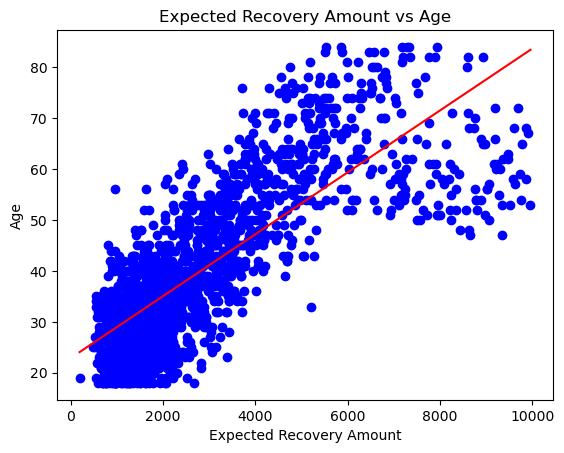

Correlation coefficient: 0.79


In [8]:
# Extract x and y values from the DataFrame
recovery_amounts = df['expected_recovery_amount']
ages = df['age']

# Compute linear regression statistics
slope, intercept, r_value, p_value, std_error = stats.linregress(recovery_amounts, ages)

# Define a function to model the linear regression
def predict_age(recovery_amount):
    return slope * recovery_amount + intercept

# Use the function to make predictions for each recovery amount
predicted_ages = list(map(predict_age, recovery_amounts))

# Plot the data and the linear regression line
plt.scatter(recovery_amounts, ages, color='blue')
plt.plot(recovery_amounts, predicted_ages, color='red')
plt.title('Expected Recovery Amount vs Age')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Age')
plt.show()

# Output the correlation coefficient
print(f'Correlation coefficient: {r_value:.2f}')

## A scatter plot for age vs expected recovery amount for values less than the threshold 1000

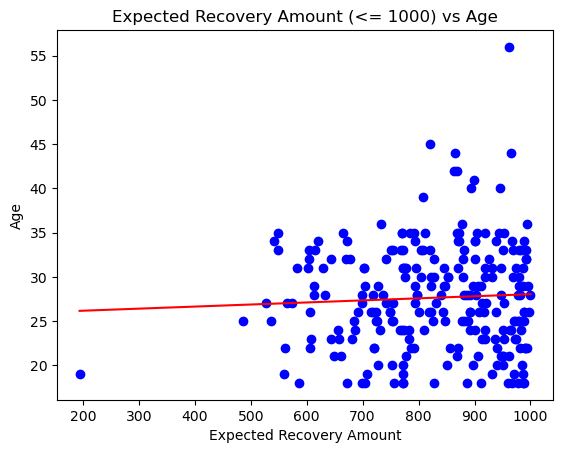

Correlation coefficient: 0.05


In [9]:
# Filter the DataFrame to include only rows with expected recovery amount <= 1000
filtered_df = df[df['expected_recovery_amount'] <= 1000]

# Extract x and y values from the filtered DataFrame
recovery_amounts = filtered_df['expected_recovery_amount']
ages = filtered_df['age']

# Compute linear regression statistics
slope, intercept, r_value, p_value, std_error = stats.linregress(recovery_amounts, ages)

# Define a function to model the linear regression
def predict_age(recovery_amount):
    return slope * recovery_amount + intercept

# Use the function to make predictions for each recovery amount
predicted_ages = list(map(predict_age, recovery_amounts))

# Plot the data and the linear regression line
plt.scatter(recovery_amounts, ages, color='blue')
plt.plot(recovery_amounts, predicted_ages, color='red')
plt.title('Expected Recovery Amount (<= 1000) vs Age')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Age')
plt.show()

# Output the correlation coefficient
print(f'Correlation coefficient: {r_value:.2f}')

As we can see here there is no correlation between the expected recovery amount and age for values below 1000 as the correlation coefficient is equal to 0.05

## A scatter plot for age vs expected recovery amount for values above the threshold 1000

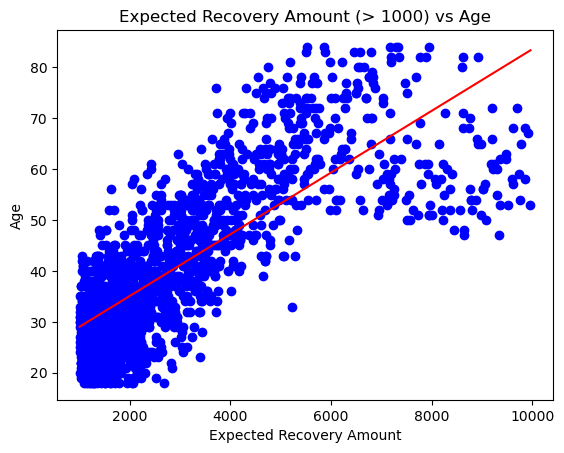

Correlation coefficient: 0.78


In [10]:
# Filter the DataFrame to include only rows with expected recovery amount > 1000
filtered_df = df[df['expected_recovery_amount'] > 1000]

# Extract x and y values from the filtered DataFrame
recovery_amounts = filtered_df['expected_recovery_amount']
ages = filtered_df['age']

# Compute linear regression statistics
slope, intercept, r_value, p_value, std_error = stats.linregress(recovery_amounts, ages)

# Define a function to model the linear regression
def predict_age(recovery_amount):
    return slope * recovery_amount + intercept

# Use the function to make predictions for each recovery amount
predicted_ages = list(map(predict_age, recovery_amounts))

# Plot the data and the linear regression line
plt.scatter(recovery_amounts, ages, color='blue')
plt.plot(recovery_amounts, predicted_ages, color='red')
plt.title('Expected Recovery Amount (> 1000) vs Age')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Age')
plt.show()

# Output the correlation coefficient
print(f'Correlation coefficient: {r_value:.2f}')

However, for values above the threshold, there is a relation that can be represented by a straight line as the correlation coeficient is equal to 0.779 showing a direct relation between expected recovery amount and age.

## A scatter plot for age vs expected recovery amount for values around 1000

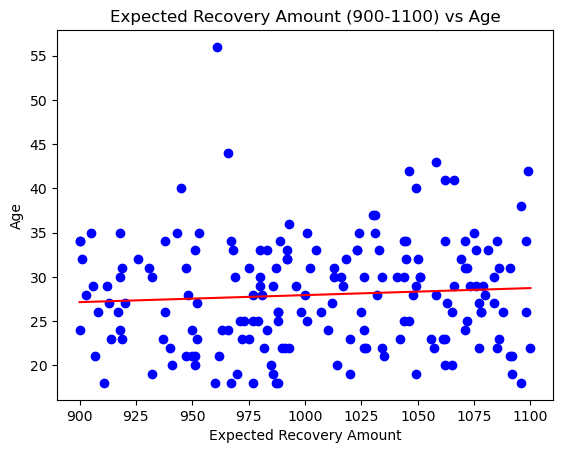

Correlation coefficient: 0.07


In [11]:
# Filter the DataFrame to include only rows with expected recovery amount between 900 and 1100
filtered_df = df[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] <= 1100)]

# Extract x and y values from the filtered DataFrame
recovery_amounts = filtered_df['expected_recovery_amount']
ages = filtered_df['age']

# Compute linear regression statistics
slope, intercept, r_value, p_value, std_error = stats.linregress(recovery_amounts, ages)

# Define a function to model the linear regression
def predict_age(recovery_amount):
    return slope * recovery_amount + intercept

# Use the function to make predictions for each recovery amount
predicted_ages = list(map(predict_age, recovery_amounts))

# Plot the data and the linear regression line
plt.scatter(recovery_amounts, ages, color='blue')
plt.plot(recovery_amounts, predicted_ages, color='red')
plt.title('Expected Recovery Amount (900-1100) vs Age')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Age')
plt.show()

# Output the correlation coefficient
print(f'Correlation coefficient: {r_value:.2f}')

As we can see, there is no direct relation between expected recovery amount and age for values around 1000

# Sex vs expected recovery amount

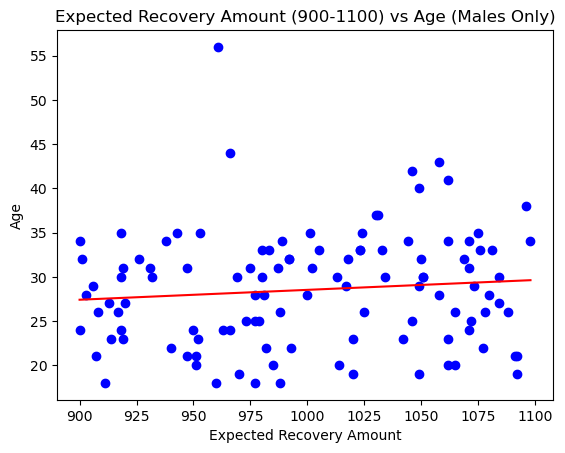

Correlation coefficient: 0.10


In [12]:
# Filter the DataFrame to include only rows with expected recovery amount between 900 and 1100 and sex is Male
filtered_df = df[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] <= 1100) & (df['sex'] == 'Male')]

# Extract x and y values from the filtered DataFrame
recovery_amounts = filtered_df['expected_recovery_amount']
ages = filtered_df['age']

# Compute linear regression statistics
slope, intercept, r_value, p_value, std_error = stats.linregress(recovery_amounts, ages)

# Define a function to model the linear regression
def predict_age(recovery_amount):
    return slope * recovery_amount + intercept

# Use the function to make predictions for each recovery amount
predicted_ages = list(map(predict_age, recovery_amounts))

# Plot the data and the linear regression line
plt.scatter(recovery_amounts, ages, color='blue')
plt.plot(recovery_amounts, predicted_ages, color='red')
plt.title('Expected Recovery Amount (900-1100) vs Age (Males Only)')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Age')
plt.show()

# Output the correlation coefficient
print(f'Correlation coefficient: {r_value:.2f}')

We can see that there is no relation between expected recovery amount and age around 1000 even when the selected sample is Males only

# Exploratory graphical analysis: recovery amount

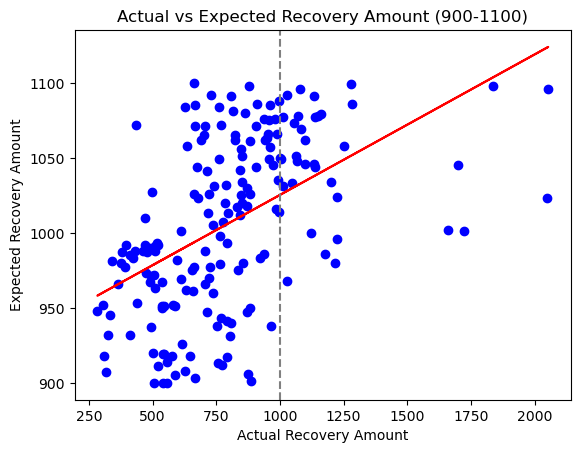

Correlation coefficient: 0.50


In [13]:
# Filter the DataFrame to include only rows with expected recovery amount between 900 and 1100
filtered_df = df[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] <= 1100)]

# Extract x and y values from the filtered DataFrame
actual_recovery_amounts = filtered_df['actual_recovery_amount']
expected_recovery_amounts = filtered_df['expected_recovery_amount']

# Compute linear regression statistics
slope, intercept, r_value, p_value, std_error = stats.linregress(actual_recovery_amounts, expected_recovery_amounts)

# Define a function to model the linear regression
def predict_expected_recovery_amount(actual_recovery_amount):
    return slope * actual_recovery_amount + intercept

# Use the function to make predictions for each actual recovery amount
predicted_expected_recovery_amounts = list(map(predict_expected_recovery_amount, actual_recovery_amounts))

# Plot the data and the linear regression line
plt.scatter(actual_recovery_amounts, expected_recovery_amounts, color='blue')
plt.plot(actual_recovery_amounts, predicted_expected_recovery_amounts, color='red')
plt.axvline(x=1000, color='gray', linestyle='--')
plt.title('Actual vs Expected Recovery Amount (900-1100)')
plt.xlabel('Actual Recovery Amount')
plt.ylabel('Expected Recovery Amount')
plt.show()

# Output the correlation coefficient
print(f'Correlation coefficient: {r_value:.2f}')

# Statistical analysis: recovery amount

In [14]:
# Filter the DataFrame to include only rows with expected recovery amount between 900 and 1100
window_1 = df[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] <= 1100)]

# Extract x and y values from the filtered DataFrame
actual_recovery_amounts_1 = window_1['actual_recovery_amount']
expected_recovery_amounts_1 = window_1['expected_recovery_amount']
age_1 = window_1['age']


# Filter the DataFrame to include only rows with expected recovery amount between 900 and 1100
window_2 = df[(df['expected_recovery_amount'] >= 950) & (df['expected_recovery_amount'] <= 1050)]

# Extract x and y values from the filtered DataFrame
actual_recovery_amounts_2 = window_2['actual_recovery_amount']
expected_recovery_amounts_2 = window_2['expected_recovery_amount']
age_2 = window_2['age']


# Perform the Kruskal-Wallis test
stat, p = kruskal(actual_recovery_amounts_1,actual_recovery_amounts_2)

# Print the test statistic and p-value
print(f"Kruskal-Wallis test statistic: {stat:.2f}")
print(f"p-value: {p:f}")

Kruskal-Wallis test statistic: 0.82
p-value: 0.364066


The test statistic is 0.82, which indicates that there is some difference between the ranked group means, but this difference is not very large. A test statistic closer to 0 would indicate that the group medians are more similar. The p-value is 0.364066, which is greater than the typical significance level of 0.05. This suggests that there is not enough evidence to reject the null hypothesis that the group medians are equal. In other words, there is no significant difference among the groups in terms of the variable being tested. Together, the test statistic and p-value indicate that there is weak evidence against the null hypothesis. This means that we cannot conclude with a high degree of certainty that there is a difference among the groups in terms of the variable being tested.

# Regression modeling: no threshold

In [15]:
# Filter the data based on the expected recovery amount
filter_df = df.loc[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] <= 1100)]

# Define the input and output variables for the linear regression model
X = filter_df[['expected_recovery_amount']]
y = filter_df['actual_recovery_amount']

# Fit the linear regression model on the filtered data
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Predict the actual recovery amount for a new expected recovery amount
new_expected_amount = [[826]]
predicted_actual_amount = regr.predict(new_expected_amount)

# Print the predicted actual recovery amount
print("Predicted actual recovery amount:", predicted_actual_amount[0])

Predicted actual recovery amount: 308.1105311214785


D:\Applications\Anaconda_Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Regression modeling: adding true threshold

The predicted recovery amount of the value is 619.6779982961215


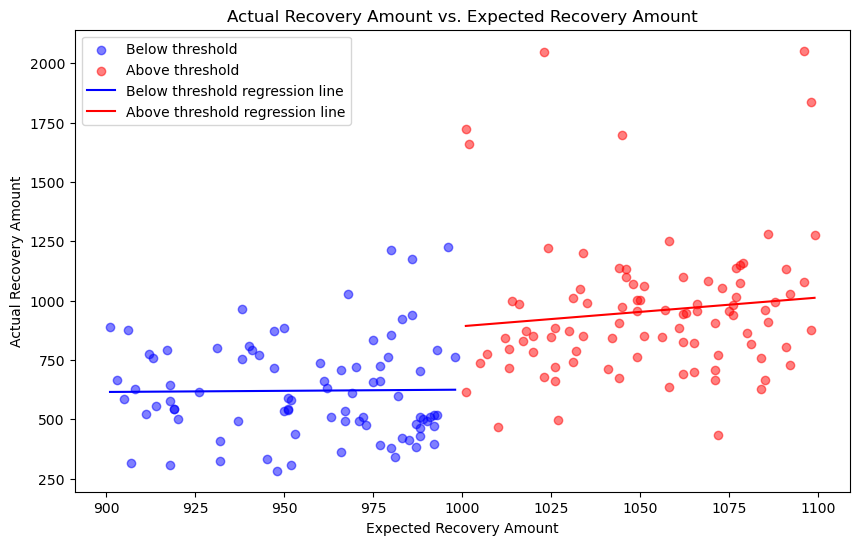

In [18]:
# Define the threshold value for filtering the data
THRESHOLD = 1000

# Filter the data based on the threshold
below_threshold = df[(df['expected_recovery_amount'] < THRESHOLD) & (df['expected_recovery_amount'] > THRESHOLD-100)]
above_threshold = df[(df['expected_recovery_amount'] > THRESHOLD) & (df['expected_recovery_amount'] < THRESHOLD+100)]

# Define the independent and dependent variables
independent_variable = 'expected_recovery_amount'
dependent_variable = 'actual_recovery_amount'

# Fit linear regression model for below_threshold data only
model_below = stats.linregress(below_threshold[independent_variable], below_threshold[dependent_variable])

# Generate the predicted values for model_below
x_vals_below = np.linspace(below_threshold[independent_variable].min(), below_threshold[independent_variable].max(), 100)
y_vals_below = model_below.intercept + model_below.slope * x_vals_below

# Fit linear regression model for above_threshold data only
model_above = stats.linregress(above_threshold[independent_variable], above_threshold[dependent_variable])

# Generate the predicted values for model_above
x_vals_above = np.linspace(above_threshold[independent_variable].min(), above_threshold[independent_variable].max(), 100)
y_vals_above = model_above.intercept + model_above.slope * x_vals_above

# Define function to predict the values based on the threshold
def predict_recovery_amount(x):
    if x < THRESHOLD:
        slope, intercept, r, p, std_err = model_below
    else:
        slope, intercept, r, p, std_err = model_above
    return slope * x + intercept

# Test the predict_recovery_amount function
value = 950
print("The predicted recovery amount of the value is " + str(predict_recovery_amount(value)))

# Plot the data and regression lines
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(below_threshold[independent_variable], below_threshold[dependent_variable], label='Below threshold', color='blue', alpha=0.5)
ax.scatter(above_threshold[independent_variable], above_threshold[dependent_variable], label='Above threshold', color='red', alpha=0.5)
ax.plot(x_vals_below, y_vals_below, color='blue', label='Below threshold regression line')
ax.plot(x_vals_above, y_vals_above, color='red', label='Above threshold regression line')
ax.legend()
ax.set_xlabel('Expected Recovery Amount')
ax.set_ylabel('Actual Recovery Amount')
ax.set_title('Actual Recovery Amount vs. Expected Recovery Amount')
plt.show()

Here, there is a discontinuity jump around the threshold 1000 that makes the analysis to be more convenient to make a threshol around 1000

The predicted recovery amount of the value is 550.5977022512941


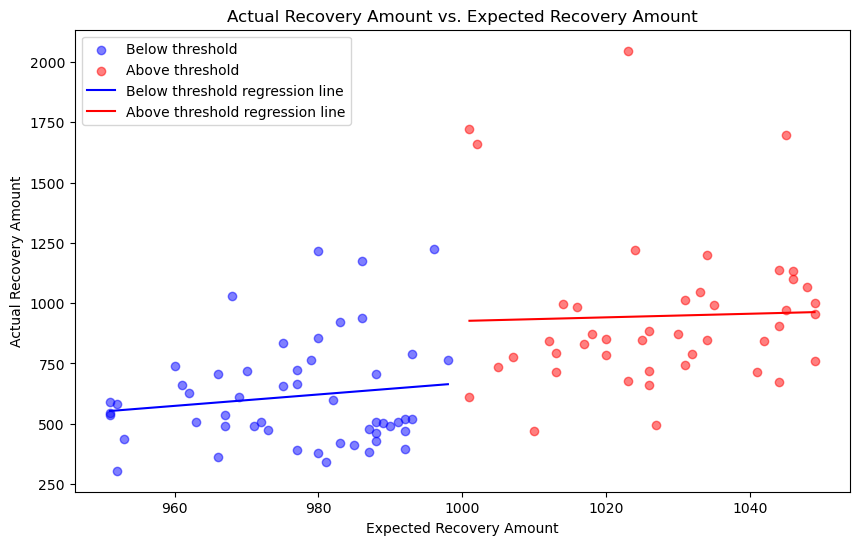

In [19]:
# Define the threshold value for filtering the data
THRESHOLD = 1000

# Filter the data based on the threshold
below_threshold = df[(df['expected_recovery_amount'] < THRESHOLD) & (df['expected_recovery_amount'] > THRESHOLD-50)]
above_threshold = df[(df['expected_recovery_amount'] > THRESHOLD) & (df['expected_recovery_amount'] < THRESHOLD+50)]

# Define the independent and dependent variables
independent_variable = 'expected_recovery_amount'
dependent_variable = 'actual_recovery_amount'

# Fit linear regression model for below_threshold data only
model_below = stats.linregress(below_threshold[independent_variable], below_threshold[dependent_variable])

# Generate the predicted values for model_below
x_vals_below = np.linspace(below_threshold[independent_variable].min(), below_threshold[independent_variable].max(), 100)
y_vals_below = model_below.intercept + model_below.slope * x_vals_below

# Fit linear regression model for above_threshold data only
model_above = stats.linregress(above_threshold[independent_variable], above_threshold[dependent_variable])

# Generate the predicted values for model_above
x_vals_above = np.linspace(above_threshold[independent_variable].min(), above_threshold[independent_variable].max(), 100)
y_vals_above = model_above.intercept + model_above.slope * x_vals_above

# Define function to predict the values based on the threshold
def predict_recovery_amount(x):
    if x < THRESHOLD:
        slope, intercept, r, p, std_err = model_below
    else:
        slope, intercept, r, p, std_err = model_above
    return slope * x + intercept

# Test the predict_recovery_amount function
value = 950
print("The predicted recovery amount of the value is " + str(predict_recovery_amount(value)))

# Plot the data and regression lines
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(below_threshold[independent_variable], below_threshold[dependent_variable], label='Below threshold', color='blue', alpha=0.5)
ax.scatter(above_threshold[independent_variable], above_threshold[dependent_variable], label='Above threshold', color='red', alpha=0.5)
ax.plot(x_vals_below, y_vals_below, color='blue', label='Below threshold regression line')
ax.plot(x_vals_above, y_vals_above, color='red', label='Above threshold regression line')
ax.legend()
ax.set_xlabel('Expected Recovery Amount')
ax.set_ylabel('Actual Recovery Amount')
ax.set_title('Actual Recovery Amount vs. Expected Recovery Amount')
plt.show()

As we can see, after making the window smaller, the threshold is still the same as there is a discontinuity jump.